In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [32]:
data = pd.read_csv(r"data.csv")
data.Date = pd.to_datetime(data.Date)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Revenue                         2132 non-null   float64       
 1   Gross Profit                    2132 non-null   float64       
 2   Operating Income                2132 non-null   float64       
 3   Pretax Income                   2132 non-null   float64       
 4   Diluted EPS                     2132 non-null   float64       
 5   EBITDA                          2132 non-null   float64       
 6   ROA                             2132 non-null   float64       
 7   ROE                             2132 non-null   float64       
 8   Total Current Assets            2132 non-null   float64       
 9   Total Long-Term Assets          2132 non-null   float64       
 10  Total Assets                    2132 non-null   float64       
 11  Tota

In [34]:
data.head()

,Revenue,Gross Profit,Operating Income,Pretax Income,Diluted EPS,EBITDA,ROA,ROE,Total Current Assets,Total Long-Term Assets,...,Total Noncurrent Liabilities,Total Liabilities,Total Equity,Cash from Operations,Cash from Investing Activities,Cash from Financing Activities,Date,Company,Revenue target,Operating Income target
0,0.000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,...,0.000,0.000,0.000000,0.000,0.000,0.000,2011-03-31,AMPY,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,...,0.000,0.000,0.000000,0.000,0.000,0.000,2011-06-30,AMPY,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,...,0.000,0.000,0.000000,0.000,0.000,0.000,2011-09-30,AMPY,61.863,-32.289
3,61.863,25.009,-32.289,-33.640,0.000000,-2.230,0.016981,0.032987,48.110,576.545976,...,253.300,339.154,285.502016,38.239,-79.880,38.765,2011-12-31,AMPY,48.410,2.342
4,48.410,13.782,2.342,0.659,-0.086831,30.369,0.000000,0.000000,42.309,646.299976,...,272.896,420.614,267.995008,34.316,-72.466,40.000,2012-03-31,AMPY,49.259,4.064


In [35]:
lst=[]
groups = data.groupby('Company')
for comapny,group in groups:
    group['Revenue target change'] = group[['Revenue target']] - group[['Revenue target']].shift(1).fillna(0)
    group['Operating Income target change'] = group[['Operating Income target']] - group[['Operating Income target']].shift(1).fillna(0)
    group.fillna(0, inplace=True)
    lst.append(group)
data = pd.concat(lst)

In [36]:
train_data = data[data.Date < '2020-06-30']
test_data = data[data.Date >= '2020-06-30']

### **EDA**

Кол-во строк, состоящих из нулей на ... %:
- 10%, 284 шт.
- 20%, 213 шт.
- 30%, 207 шт.
- 40%, 206 шт.
- 80%, 199 шт.
- 100%, 198 шт.

Избавлюсь от строк которые состоят из нулей более чем на 20%. В тестовом наборе данных нулей нет.

In [37]:
train_data = train_data.loc[~((train_data.drop(columns = ['Date', 'Company']) == 0).sum(axis=1) / 18 >= 0.2)]

По некоторым компаниями довольно мало строк, например 6 по MNRL 6, 10 по BRY

In [38]:
train_data.groupby('Company')['Revenue target'].count()

Company
AMPY    34
APA     37
AR      34
BATL    37
BCEI    37
BRY      9
BSM     21
CDEV    17
CHK     37
CLR     37
CNX     37
COG     37
COP     37
CPE     37
CRC     22
CRK     37
DEN     37
DVN     37
EGY     37
EOG     37
EQT     37
ESTE    37
FANG    35
GDP     37
HES     37
LONE    17
LPI     35
MCF     37
MGY      9
MNRL     5
MRO     37
MTDR    37
MUR     37
NOG     37
OAS     37
OVV     37
PDCE    37
PVAC    37
PXD     37
REI     29
RRC     37
SBOW    36
SD      37
SM      37
SWN     37
TALO    37
TPL     37
VNOM    22
WLL     37
WTI     37
XEC     37
XOG     16
Name: Revenue target, dtype: int64

Агрегации по признакам компаний

In [39]:
train_data.groupby('Company').agg(['mean', 'std', 'min', 'max']).head()

C:\Users\andre\AppData\Local\Temp\ipykernel_8272\3285247391.py:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  train_data.groupby('Company').agg(['mean', 'std', 'min', 'max']).head()


Revenue                                        Gross Profit  \
                mean          std          min          max         mean   
Company                                                                    
AMPY       88.108470    39.938381    48.410000   166.518000    35.257206   
APA      2584.189191  1242.134938  1084.000000  4496.000000   949.513527   
AR        657.956852   349.468652    92.034000  1242.779008   244.179495   
BATL      138.883650    99.732188    24.197000   311.999008    57.707649   
BCEI       74.981866    34.539640    21.436696   155.376992    33.311001   

                                             Operating Income              \
                std         min          max             mean         std   
Company                                                                     
AMPY      18.987894    5.344000    76.038000        16.493147   19.346591   
APA      764.304669 -185.999872  2329.999872       808.615121  784.663626   
AR       143.907322   34.724000   549.396032       109.147177   84.373914   
BATL      44.440840    4.862000   144.127000        30.989514   36.587686   
BCEI      17.024821    9.721000    70.267000        15.860635   19.950027   

         ... Operating Income target              Revenue target change  \
         ...                     min          max                  mean   
Company  ...                                                              
AMPY     ...                 -16.952    56.431000             -0.785059   
APA      ...                -369.000  2227.000064             16.108108   
AR       ...                 -96.802   293.868992             23.097412   
BATL     ...                 -13.896   110.428000              1.377135   
BCEI     ...                 -45.610    55.931000              0.978162   

                                              Operating Income target change  \
                std          min          max                           mean   
Company                                                                        
AMPY      17.494978   -49.921000    44.358000                       0.496529   
APA      809.976170 -1053.000064  4386.999808                      -9.972973   
AR       115.935244  -239.949024   386.426016                      -4.998853   
BATL      31.566855   -71.676000    74.747008                       0.216351   
BCEI      15.241024   -47.974000    25.534000                      -0.274676   

                                           
                std      min          max  
Company                                    
AMPY      14.282545  -35.030    34.631000  
APA      471.498725 -858.000  2227.000064  
AR        90.942792 -289.814   199.323000  
BATL      19.604235  -53.893    39.000000  
BCEI      16.421030  -34.761    43.514000  

[5 rows x 88 columns]

### **Visualisation**

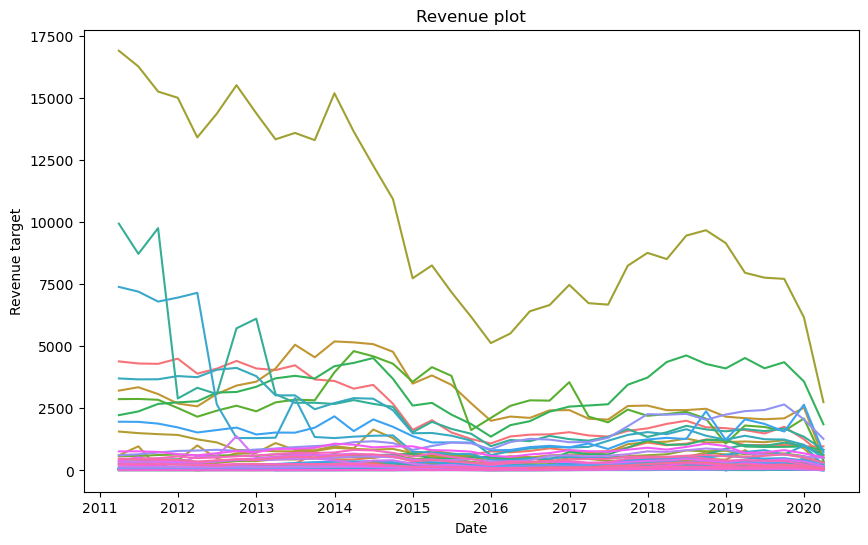

In [40]:
plt.figure(figsize = (10,6))
plt.title("Revenue plot")
sns.lineplot(data=train_data, x="Date", y="Revenue target", hue="Company", legend = False)
plt.show()

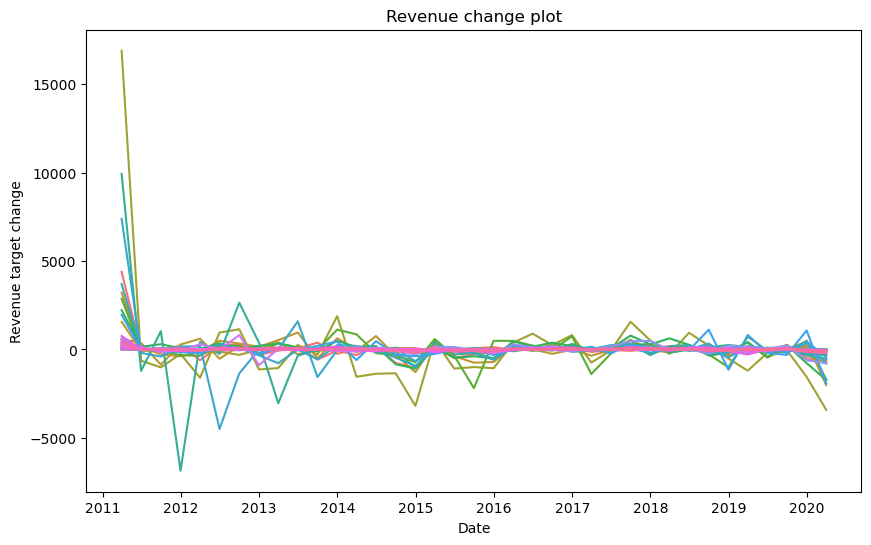

In [41]:
plt.figure(figsize = (10,6))
plt.title("Revenue change plot")
sns.lineplot(data=train_data, x="Date", y="Revenue target change", hue="Company", legend = False)
plt.show()

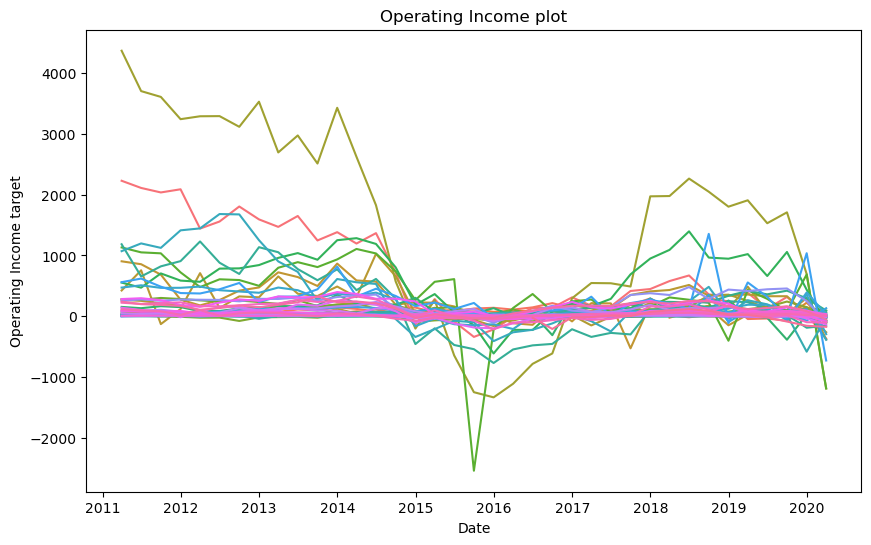

In [42]:
plt.figure(figsize = (10,6))
plt.title("Operating Income plot")
sns.lineplot(data=train_data, x="Date", y="Operating Income target", hue="Company", legend = False)
plt.show()

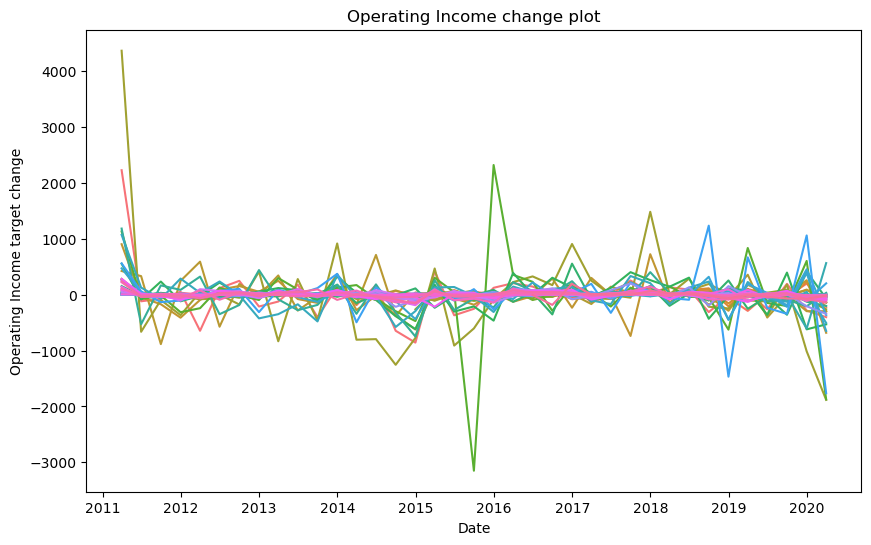

In [43]:
plt.figure(figsize = (10,6))
plt.title("Operating Income change plot")
sns.lineplot(data=train_data, x="Date", y="Operating Income target change", hue="Company", legend = False)
plt.show()

Данные сильно скоррелированы, поэтому могут возникнуть проблемы с линейными моделями, однако с этим легко побороться L1 / L2 регуляризацией

In [17]:
corr=train_data.corr()

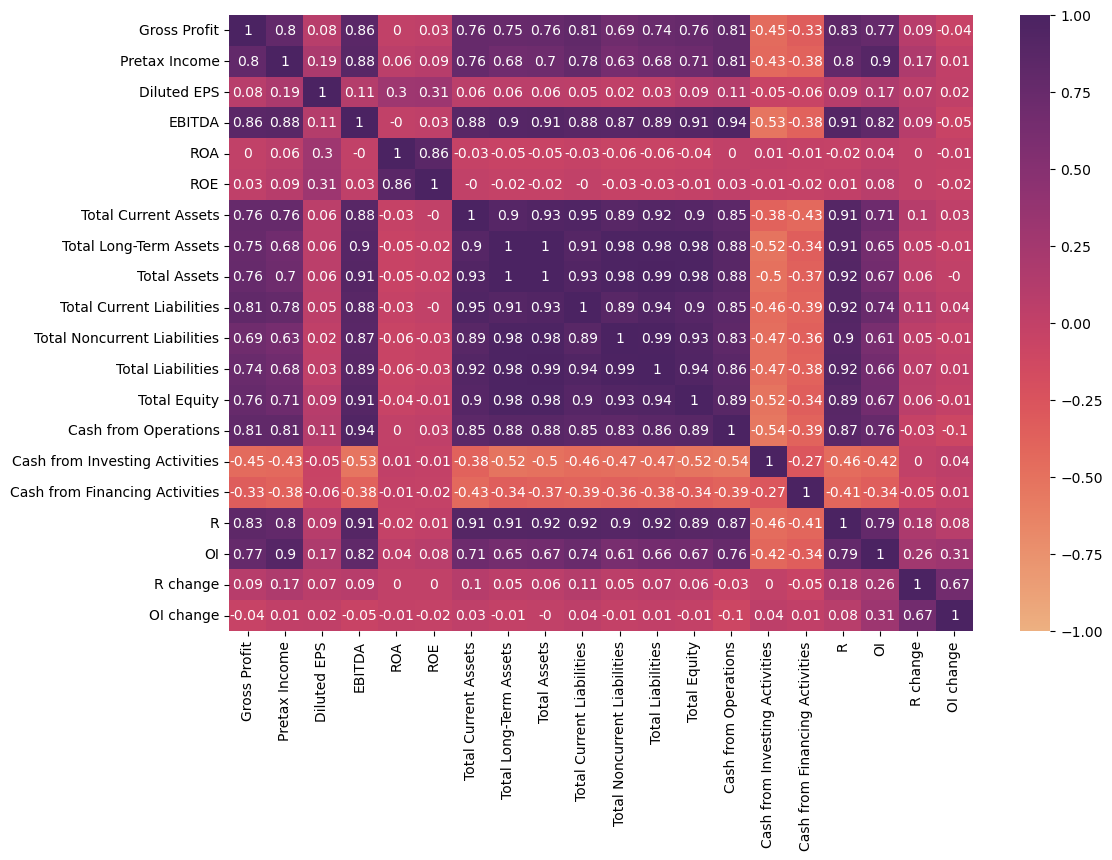

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(np.around(corr, decimals = 2), vmin=-1, vmax=1, cmap='flare', annot=True)
plt.show()

[]

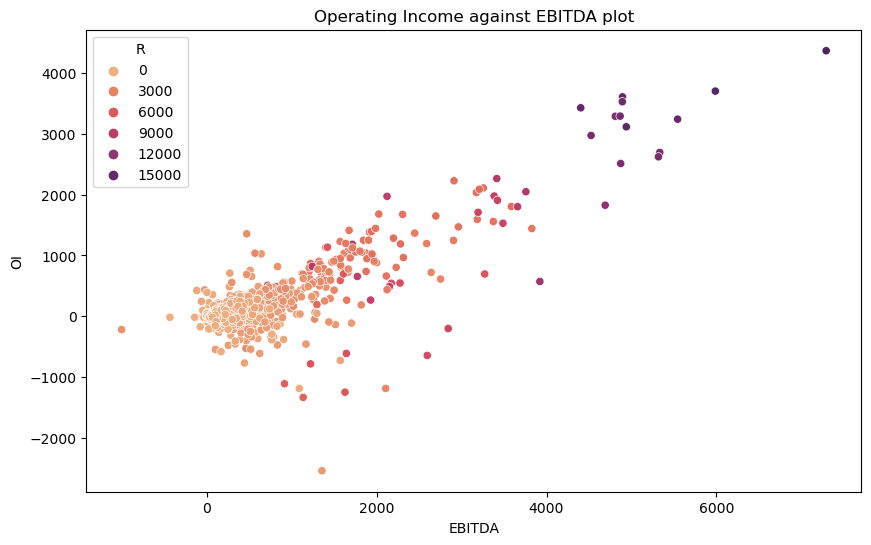

In [19]:
plt.figure(figsize = (10,6))
plt.title("Operating Income against EBITDA plot")
sns.scatterplot(data=train_data, x="EBITDA", y="OI", hue = 'R', palette = 'flare')
plt.plot()

### **Metric**

Если мы хотим выбрать общую метрику качества для нашей задачи, то нам не подойдет MAE, MSE и т.д. От компании к компании они могут сильно варьироваться, так для одной компании MAE=10000 может быть потрясающим результатом, то для другой ужасным. Думаю для данной задачи подойдет метрика качества MAPE, так как она показывает ошибку в процентах, посчитаем MAPE для каждой компании, а затем усредним их и найдем среднюю ошибку в процентах для всех компаний 